**Imports**

In [20]:
# Auto reload
%load_ext autoreload
%autoreload 2

# Import necessary libraries
from data_preprocessing import preprocess_data
from feature_extraction import get_feature_extractor
from model_training import train_model
from model_evaluation import evaluate_single_model, compare_models
from config import MODELS
import warnings
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import MatplotlibDeprecationWarning

# Warning suppression
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Preprocess Info**


Dataset Summary:
  Total Images: 3264
  Image Shape: (224, 224, 3)

---

Original class distribution:
  Class 0: 926 images
  Class 1: 937 images
  Class 2: 500 images
  Class 3: 901 images


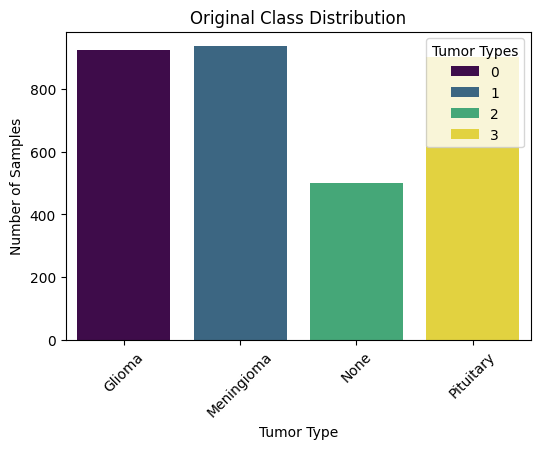

---

Augmenting class 0 with 11 synthetic samples...


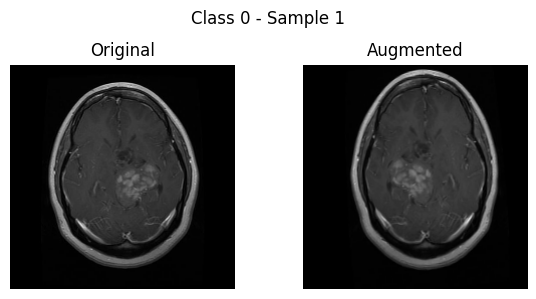

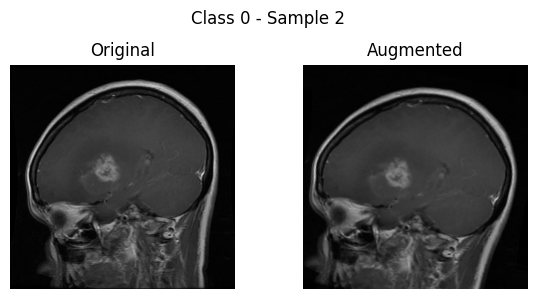

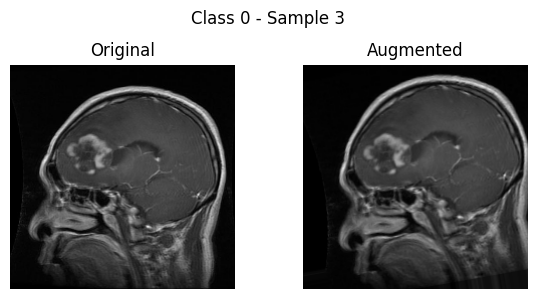

---

Augmenting class 2 with 437 synthetic samples...


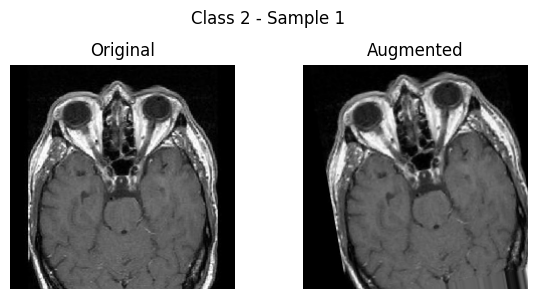

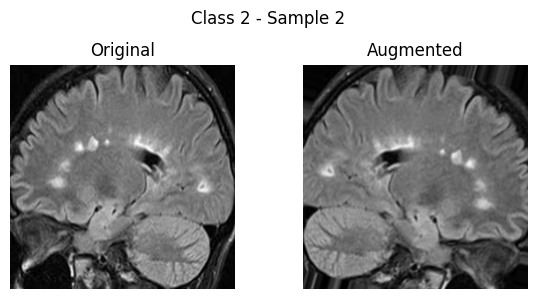

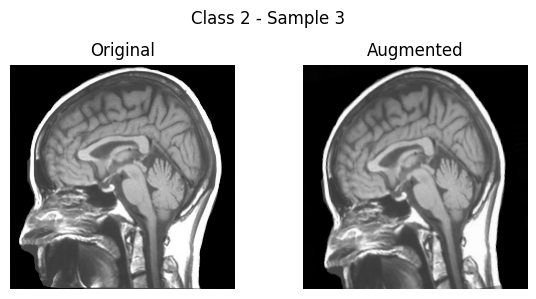

---

Augmenting class 3 with 36 synthetic samples...


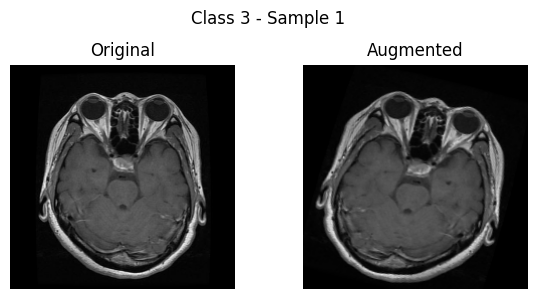

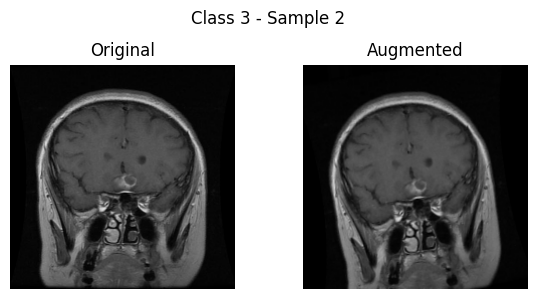

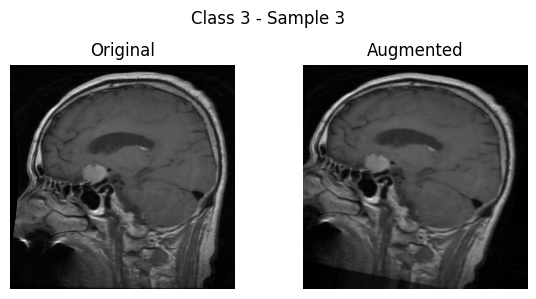

---

Augmented class distribution:
  Class 0: 937 images
  Class 1: 937 images
  Class 2: 937 images
  Class 3: 937 images

---

Final dataset shape: (3748, 224, 224, 3), Labels: (3748,)

---

Train dataset distribution: [656, 656, 655, 656]
Test dataset distribution: [281, 281, 282, 281]


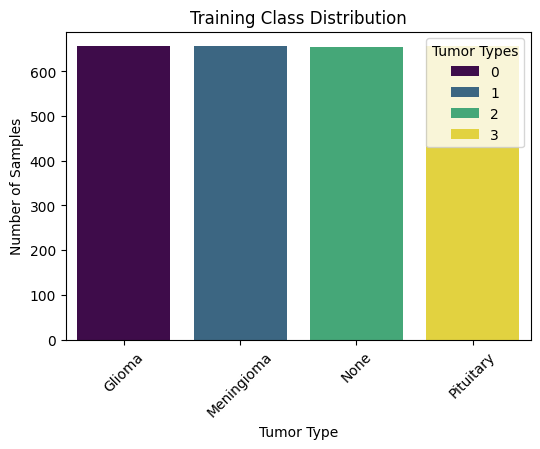

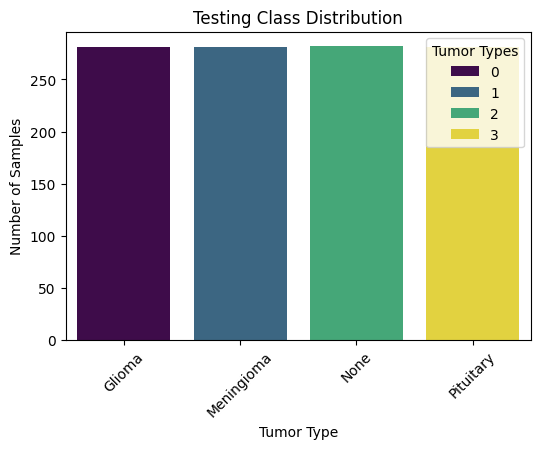

---



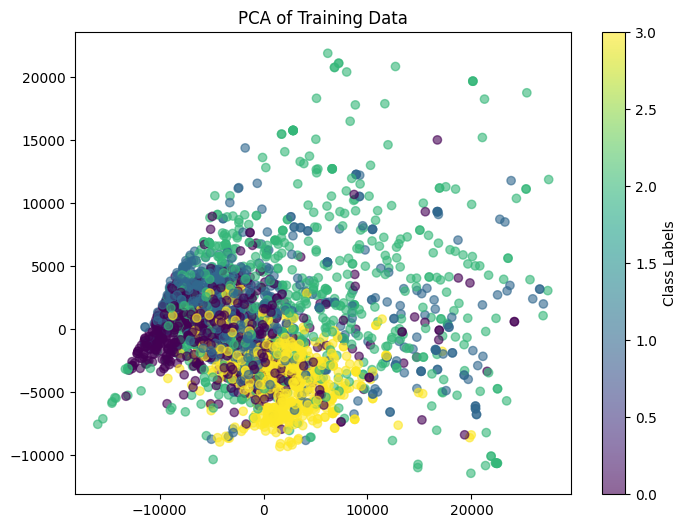

In [16]:
# Set the model name to the first model in the MODELS list
model_name = MODELS[0]  # This selects the first model name from the MODELS list

# Preprocess the data (loading, splitting, and normalizing images), and store the results
X_train, X_test, y_train, y_test, class_names = preprocess_data(model_name, verbose=True)
# X_train: Training images
# X_test: Test images
# y_train: Labels for the training data
# y_test: Labels for the test data
# class_names: List of class names corresponding to the labels

# Initialize dictionaries to store trained models and validation accuracies
trained_models = {}  # Dictionary to store models trained during the training loop
validation_accuracies_per_model = {}  # Dictionary to store validation accuracies for each trained model

**ResNet50 Training**


Training Fold 1...
Epoch 1/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 156s 4s/step - accuracy: 0.6120 - loss: 1.2122 - val_accuracy: 0.7210 - val_loss: 1.3194 - learning_rate: 0.0010
Epoch 2/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.8865 - loss: 0.3339 - val_accuracy: 0.8338 - val_loss: 0.5656 - learning_rate: 0.0010

Training Fold 2...
Epoch 1/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.8381 - loss: 0.4712 - val_accuracy: 0.9199 - val_loss: 0.2524 - learning_rate: 0.0010
Epoch 2/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.9405 - loss: 0.1876 - val_accuracy: 0.9375 - val_loss: 0.1905 - learning_rate: 0.0010

Best model saved to: models/ResNet50.keras


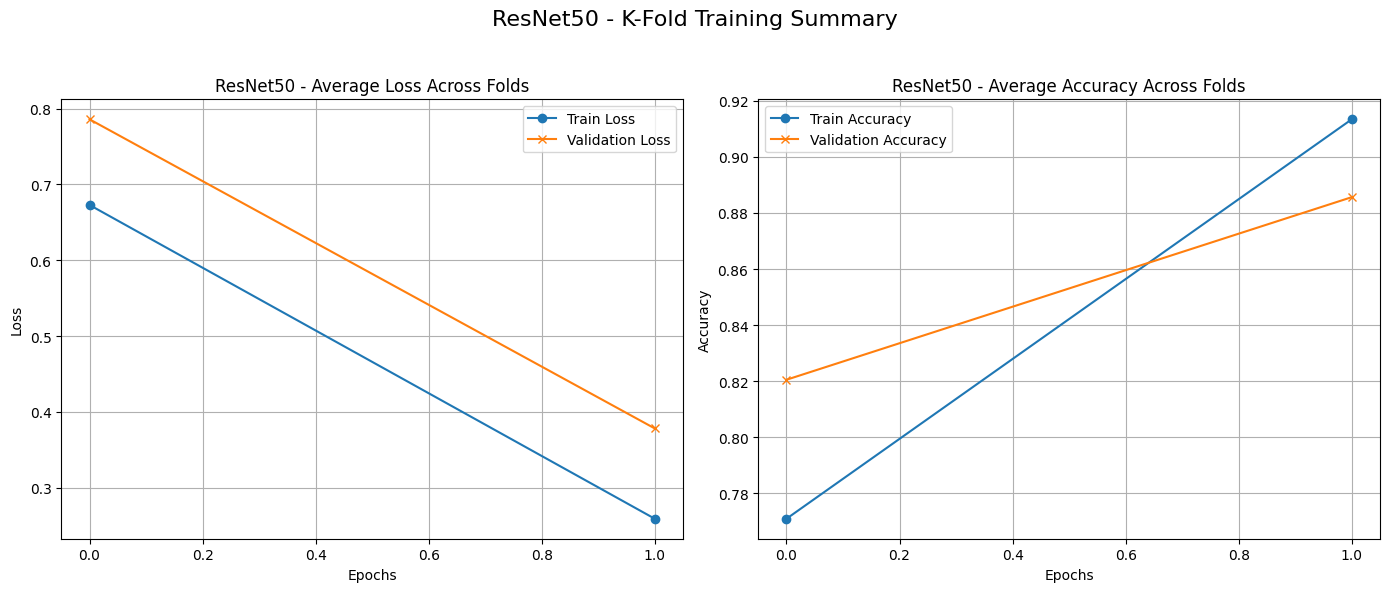

ResNet50 training complete!


In [17]:
# Get the feature extractor model for the given model name (e.g., ResNet50, VGG16, etc.)
model = get_feature_extractor(model_name)  # Loads the feature extraction model based on the model_name

# Train the model using K-Fold cross-validation and store the model along with fold validation accuracies
model, fold_accuracies = train_model(model, model_name, X_train, y_train)
# model: The trained model returned by the train_model function
# fold_accuracies: Validation accuracies across the different folds during cross-validation

# Store the validation accuracies for this model in the validation_accuracies_per_model dictionary
validation_accuracies_per_model[model_name] = fold_accuracies  # Maps the model_name to its fold accuracies

# Store the trained model and related test data in the trained_models dictionary
trained_models[model_name] = {
    "model": model,  # The trained model
    "X_test": X_test,  # The test dataset for evaluation
    "y_test": y_test,  # The test labels
    "class_names": class_names  # The list of class names for the labels
}

# Print a message indicating the model training is complete
print(f"{model_name} training complete!")  # Prints confirmation after model training is done

**VGG16 Training**


Training Fold 1...
Epoch 1/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 231s 6s/step - accuracy: 0.6172 - loss: 1.1297 - val_accuracy: 0.7767 - val_loss: 1.0083 - learning_rate: 0.0010
Epoch 2/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 223s 6s/step - accuracy: 0.9006 - loss: 0.2852 - val_accuracy: 0.8590 - val_loss: 0.4691 - learning_rate: 0.0010

Training Fold 2...
Epoch 1/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 228s 6s/step - accuracy: 0.8474 - loss: 0.4620 - val_accuracy: 0.9382 - val_loss: 0.1663 - learning_rate: 0.0010
Epoch 2/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 225s 6s/step - accuracy: 0.9362 - loss: 0.1740 - val_accuracy: 0.9535 - val_loss: 0.1321 - learning_rate: 0.0010

Best model saved to: models/VGG16.keras


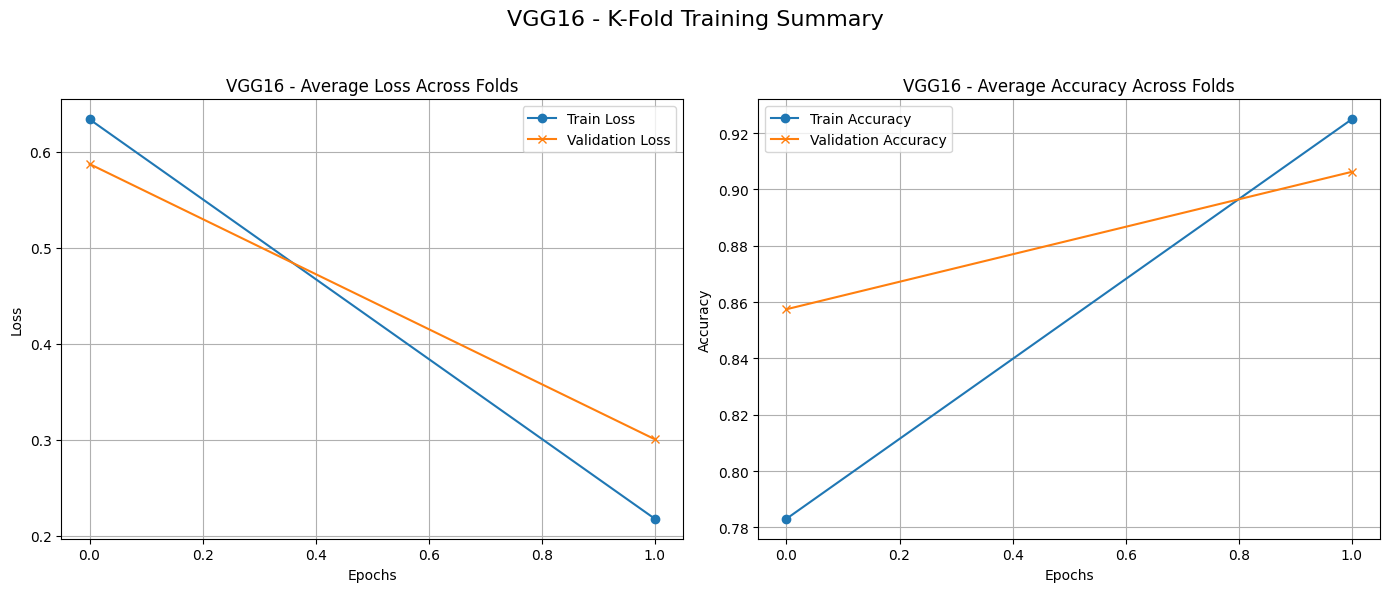

VGG16 training complete!


In [ ]:
# Select the second model from the MODELS list for training (e.g., VGG16, InceptionV3, etc.)
model_name = MODELS[1]  # Set the model name to the second model in the list

# Preprocess the data (train-test split, normalization) for the selected model
X_train, X_test, y_train, y_test, class_names = preprocess_data(model_name, verbose=False)
# X_train, X_test: Training and testing image data
# y_train, y_test: Training and testing labels
# class_names: The list of class names (e.g., Tumor types)

# Get the feature extraction model for the selected model
model = get_feature_extractor(model_name)  # Loads the feature extraction model based on model_name

# Train the model using K-Fold cross-validation and store the model and fold validation accuracies
model, fold_accuracies = train_model(model, model_name, X_train, y_train)
# model: The trained model returned by the train_model function
# fold_accuracies: Validation accuracies across the different folds during cross-validation

# Store the validation accuracies for this model in the validation_accuracies_per_model dictionary
validation_accuracies_per_model[model_name] = fold_accuracies  # Maps model_name to its fold accuracies

# Store the trained model and related test data in the trained_models dictionary
trained_models[model_name] = {
    "model": model,  # The trained model
    "X_test": X_test,  # The test dataset for evaluation
    "y_test": y_test,  # The test labels
    "class_names": class_names  # The list of class names for the labels
}

# Print a message indicating the model training is complete
print(f"{model_name} training complete!")  # Prints confirmation after model training is done

**EfficientNetB0 Training**

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training Fold 1...
Epoch 1/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.6084 - loss: 1.2063 - val_accuracy: 0.8140 - val_loss: 0.7978 - learning_rate: 0.0010
Epoch 2/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.8293 - loss: 0.4666 - val_accuracy: 0.8483 - val_loss: 0.5112 - learning_rate: 0.0010

Training Fold 2...
Epoch 1/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.7726 - loss: 0.6203 - val_accuracy: 0.8551 - val_loss: 0.4096 - learning_rate: 0.0010
Epoch 2/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9026 - loss: 0.2683 - val_accuracy: 0.9207 - val_loss: 0.2208 - learning_rate: 0.0010

Best model saved to: models/EfficientNetB0.keras


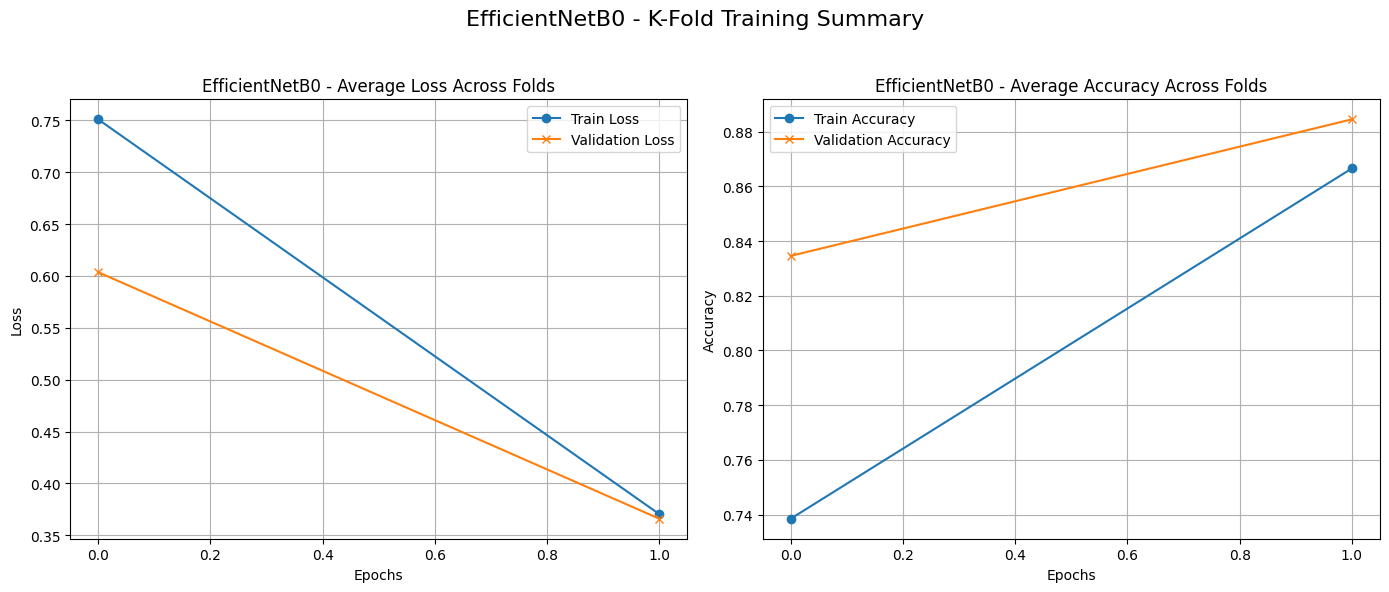

EfficientNetB0 training complete!


In [ ]:
# Select the third model from the MODELS list for training (e.g., ResNet50, EfficientNetB0, etc.)
model_name = MODELS[2]  # Set the model name to the third model in the list

# Preprocess the data (train-test split, normalization) for the selected model
X_train, X_test, y_train, y_test, class_names = preprocess_data(model_name, verbose=False)
# X_train, X_test: Training and testing image data
# y_train, y_test: Training and testing labels
# class_names: The list of class names (e.g., Tumor types)

# Get the feature extraction model for the selected model
model = get_feature_extractor(model_name)  # Loads the feature extraction model based on model_name

# Train the model using K-Fold cross-validation and store the model and fold validation accuracies
model, fold_accuracies = train_model(model, model_name, X_train, y_train)
# model: The trained model returned by the train_model function
# fold_accuracies: Validation accuracies across the different folds during cross-validation

# Store the validation accuracies for this model in the validation_accuracies_per_model dictionary
validation_accuracies_per_model[model_name] = fold_accuracies  # Maps model_name to its fold accuracies

# Store the trained model and related test data in the trained_models dictionary
trained_models[model_name] = {
    "model": model,  # The trained model
    "X_test": X_test,  # The test dataset for evaluation
    "y_test": y_test,  # The test labels
    "class_names": class_names  # The list of class names for the labels
}

# Print a message indicating the model training is complete
print(f"{model_name} training complete!")  # Prints confirmation after model training is done

**InceptionV3 Training**

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

Training Fold 1...
Epoch 1/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.6078 - loss: 1.2171 - val_accuracy: 0.6517 - val_loss: 1.3816 - learning_rate: 0.0010
Epoch 2/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.8456 - loss: 0.4548 - val_accuracy: 0.7706 - val_loss: 0.7062 - learning_rate: 0.0010

Training Fold 2...
Epoch 1/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7805 - loss: 0.6000 - val_accuracy: 0.8116 - val_loss: 0.5493 - learning_rate: 0.0010
Epoch 2/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.9033 - loss: 0.2995 - val_accuracy: 0.8940 - val_loss: 0.2978 - learning_rate: 0.0010

Best model saved to: models/InceptionV3.keras


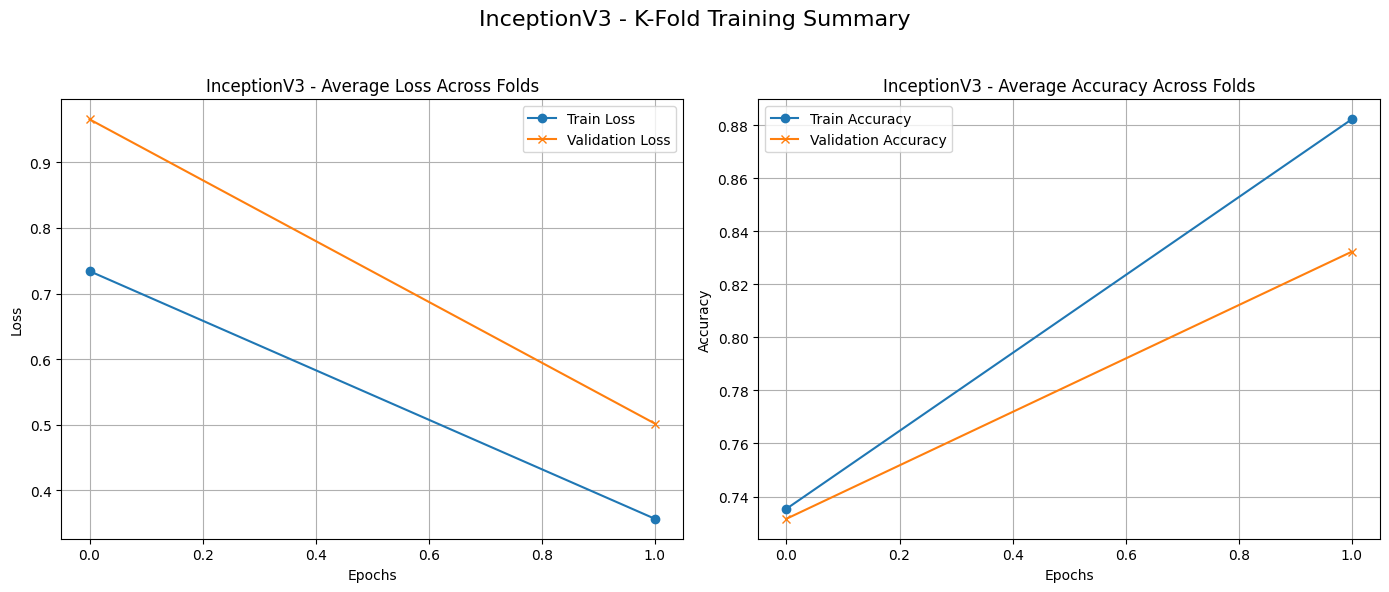

InceptionV3 training complete!


In [ ]:
# Select the fourth model from the MODELS list for training (e.g., ResNet50, EfficientNetB0, etc.)
model_name = MODELS[3]  # Set the model name to the fourth model in the list

# Preprocess the data (train-test split, normalization) for the selected model
X_train, X_test, y_train, y_test, class_names = preprocess_data(model_name, verbose=False)
# X_train, X_test: Training and testing image data
# y_train, y_test: Training and testing labels
# class_names: The list of class names (e.g., Tumor types)

# Get the feature extraction model for the selected model
model = get_feature_extractor(model_name)  # Loads the feature extraction model based on model_name

# Train the model using K-Fold cross-validation and store the model and fold validation accuracies
model, fold_accuracies = train_model(model, model_name, X_train, y_train)
# model: The trained model returned by the train_model function
# fold_accuracies: Validation accuracies across the different folds during cross-validation

# Store the validation accuracies for this model in the validation_accuracies_per_model dictionary
validation_accuracies_per_model[model_name] = fold_accuracies  # Maps model_name to its fold accuracies

# Store the trained model and related test data in the trained_models dictionary
trained_models[model_name] = {
    "model": model,  # The trained model
    "X_test": X_test,  # The test dataset for evaluation
    "y_test": y_test,  # The test labels
    "class_names": class_names  # The list of class names for the labels
}

# Print a message indicating the model training is complete
print(f"{model_name} training complete!")  # Prints confirmation after model training is done

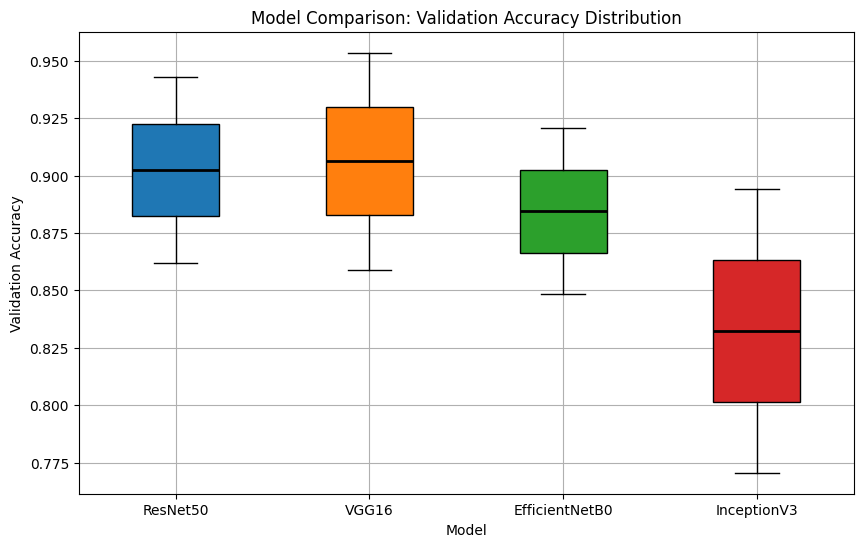

In [ ]:
# Final comparison boxplot to visualize the distribution of validation accuracies for each model
plt.figure(figsize=(10, 6))  # Set the figure size for the plot

# Extract model names and their corresponding validation accuracies
model_names = list(validation_accuracies_per_model.keys())  # List of model names
data = [validation_accuracies_per_model[name] for name in model_names]  # List of validation accuracies for each model

# Create the boxplot with the data, applying labels for each model
box = plt.boxplot(data, patch_artist=True, tick_labels=model_names)

# Use a colormap (tab10 has 10 distinct colors)
cmap = cm.get_cmap('tab10')  # Load the 'tab10' colormap which has 10 distinct colors

# Apply unique colors to the boxes (plots of each model)
for i, patch in enumerate(box['boxes']):
    color = cmap(i % cmap.N)  # Get a color from the colormap based on the model index
    patch.set_facecolor(color)  # Set the face color of each box plot

# Set all median lines to black for better visibility
for median in box['medians']:
    median.set_color('black')  # Set the color of the median lines to black
    median.set_linewidth(2)  # Set the thickness of the median lines

# Set title, axis labels, and grid
plt.title("Model Comparison: Validation Accuracy Distribution")  # Title of the plot
plt.ylabel("Validation Accuracy")  # Y-axis label
plt.xlabel("Model")  # X-axis label
plt.grid(True)  # Enable the grid for better readability of the plot

# Show the plot
plt.show()  # Display the boxplot for model comparison

**ResNet50 Evaluation**


Evaluating model: ResNet50
36/36 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step

---

Classification Report:
              precision    recall  f1-score   support

      Glioma       0.88      0.86      0.87       281
  Meningioma       0.82      0.82      0.82       281
        None       0.96      0.96      0.96       282
   Pituitary       0.94      0.96      0.95       281

    accuracy                           0.90      1125
   macro avg       0.90      0.90      0.90      1125
weighted avg       0.90      0.90      0.90      1125

---

Accuracy: 0.90

---



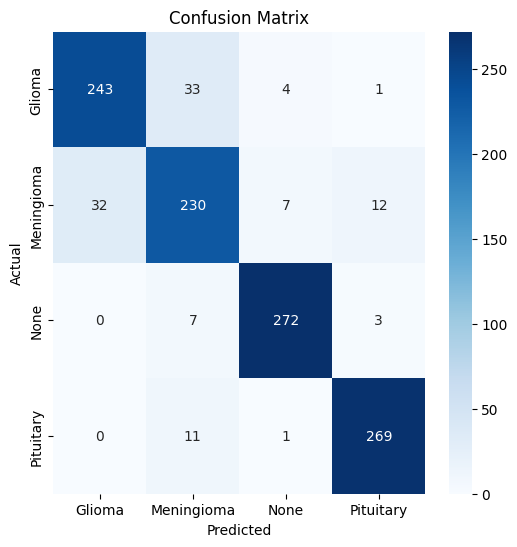

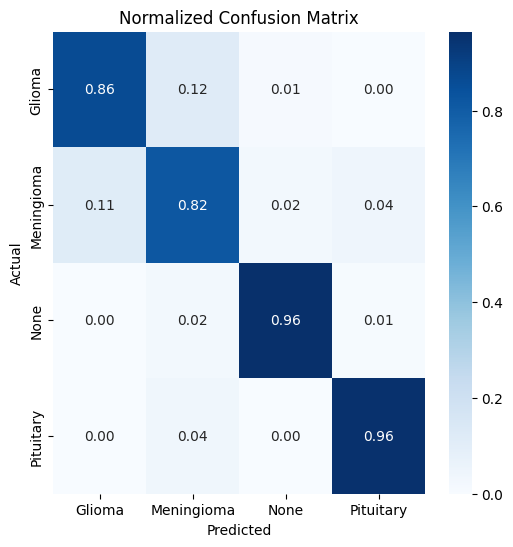

---

Multiclass ROC AUC Score: 0.98


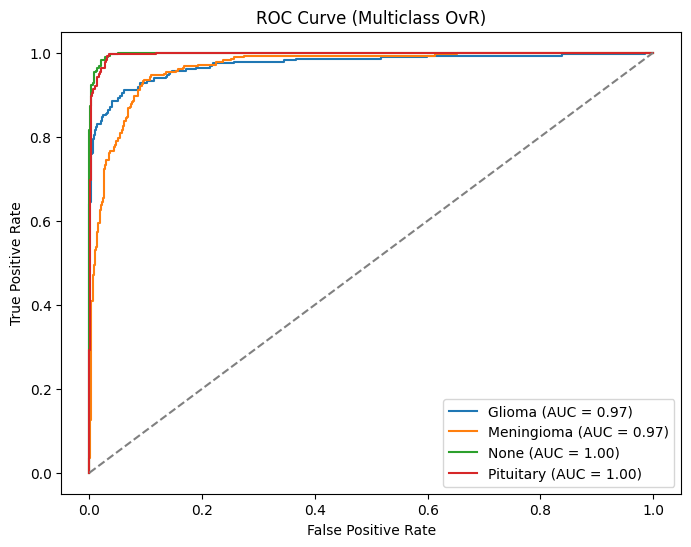

---



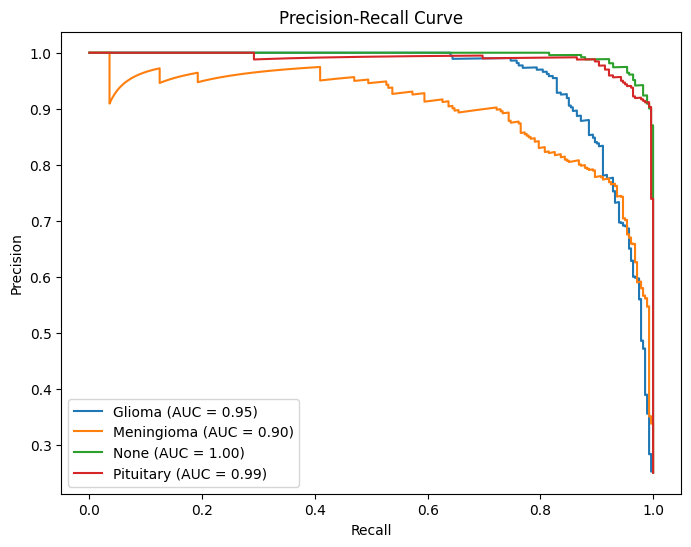

---

MCC: 0.87

---

Cohen's Kappa: 0.87


In [18]:
# Set the model name to the first model in the MODELS list
model_name = MODELS[0]

# Check if the selected model is present in the trained_models dictionary
if model_name in trained_models:
    print(f"\nEvaluating model: {model_name}")  # Print message indicating the model being evaluated

    # Call the function to evaluate the model using the test data and class names
    evaluate_single_model(
        trained_models[model_name]["model"],  # The trained model to be evaluated
        trained_models[model_name]["X_test"],  # Test data (features)
        trained_models[model_name]["y_test"],  # Test labels
        trained_models[model_name]["class_names"]  # Class names for labeling
    )
else:
    print(f"Model {model_name} not found in trained_models.")  # Print message if the model is not found in the trained models dictionary

**VGG16 Evaluation**


Evaluating model: VGG16
36/36 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step
Classification Report:
              precision    recall  f1-score   support

      Glioma       0.92      0.84      0.88       281
  Meningioma       0.83      0.90      0.86       281
        None       0.95      0.96      0.96       282
   Pituitary       0.96      0.96      0.96       281

    accuracy                           0.92      1125
   macro avg       0.92      0.92      0.92      1125
weighted avg       0.92      0.92      0.92      1125

Accuracy: 0.92


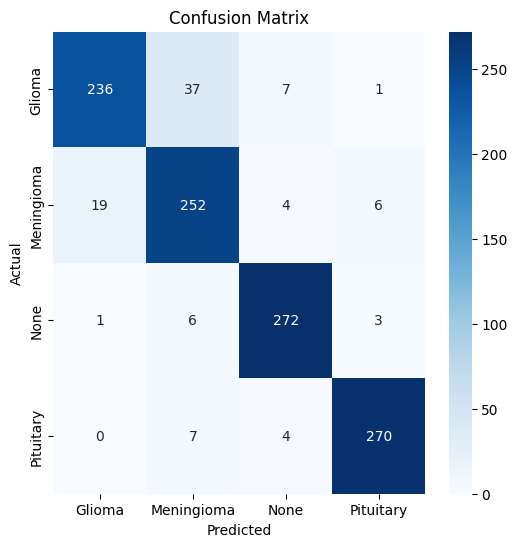

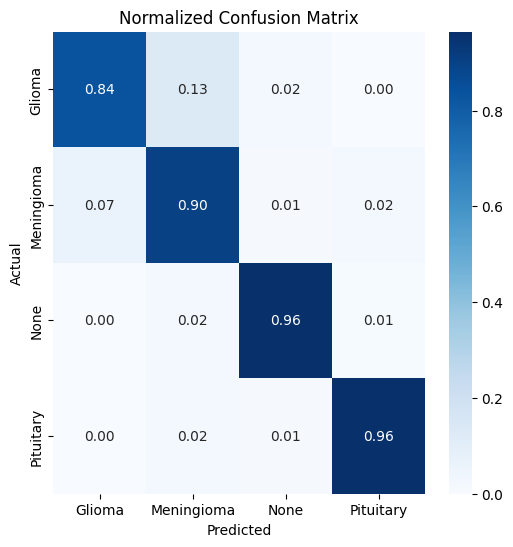

Multiclass ROC AUC Score: 0.99


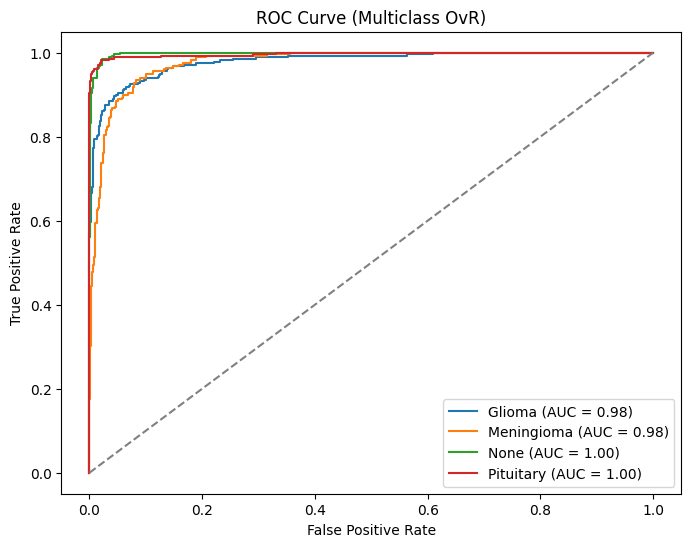

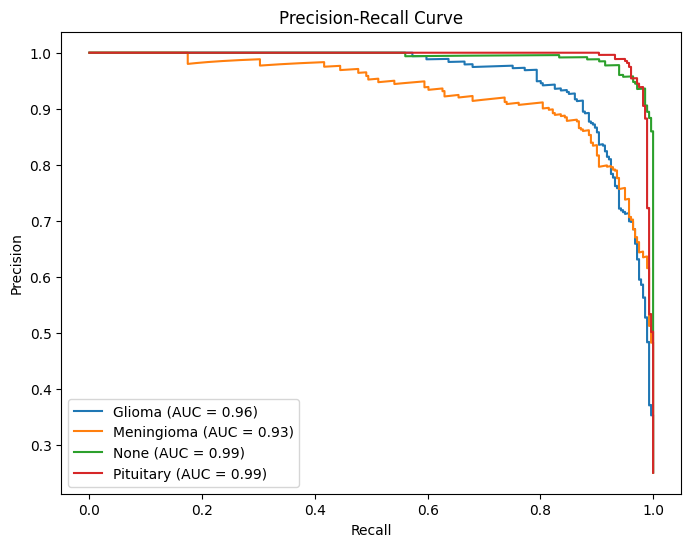

MCC: 0.89
Cohen's Kappa: 0.89


In [ ]:
# Set the model name to the second model in the MODELS list
model_name = MODELS[1]

# Check if the selected model is present in the trained_models dictionary
if model_name in trained_models:
    print(f"\nEvaluating model: {model_name}")  # Print message indicating the model being evaluated

    # Call the function to evaluate the model using the test data and class names
    evaluate_single_model(
        trained_models[model_name]["model"],  # The trained model to be evaluated
        trained_models[model_name]["X_test"],  # Test data (features)
        trained_models[model_name]["y_test"],  # Test labels
        trained_models[model_name]["class_names"]  # Class names for labeling
    )
else:
    print(f"Model {model_name} not found in trained_models.")  # Print message if the model is not found in the trained models dictionary

**EfficientNetB0 Evaluation**


Evaluating model: EfficientNetB0
36/36 ━━━━━━━━━━━━━━━━━━━━ 32s 787ms/step
Classification Report:
              precision    recall  f1-score   support

      Glioma       0.84      0.87      0.85       281
  Meningioma       0.82      0.78      0.80       281
        None       0.94      0.95      0.95       282
   Pituitary       0.96      0.96      0.96       281

    accuracy                           0.89      1125
   macro avg       0.89      0.89      0.89      1125
weighted avg       0.89      0.89      0.89      1125

Accuracy: 0.89


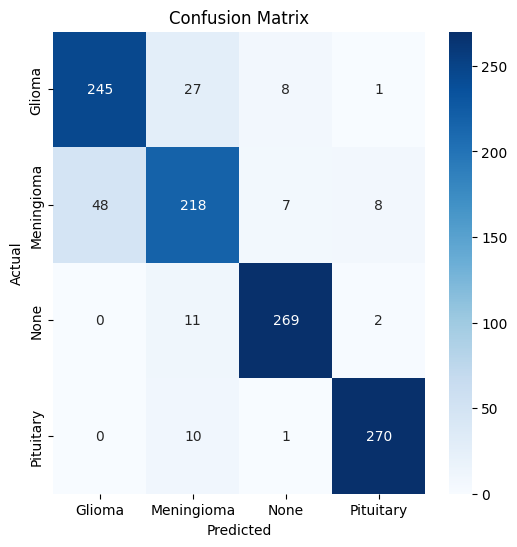

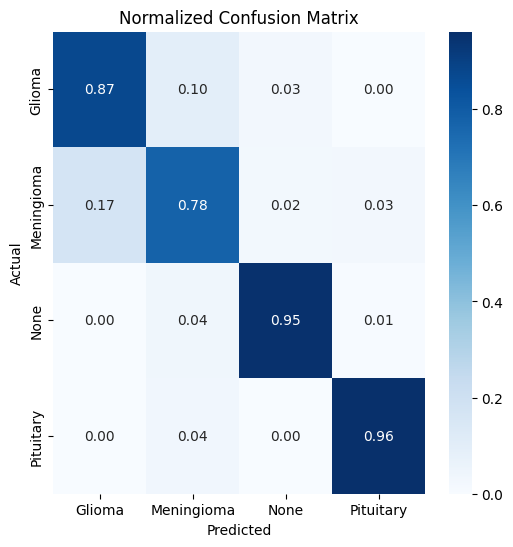

Multiclass ROC AUC Score: 0.98


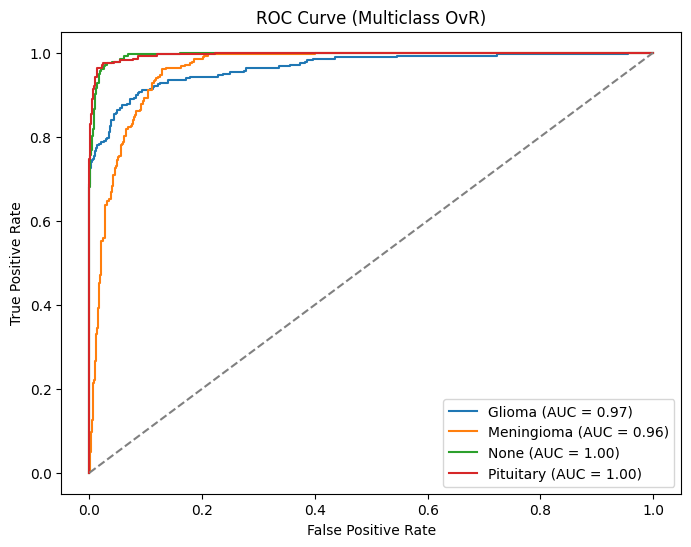

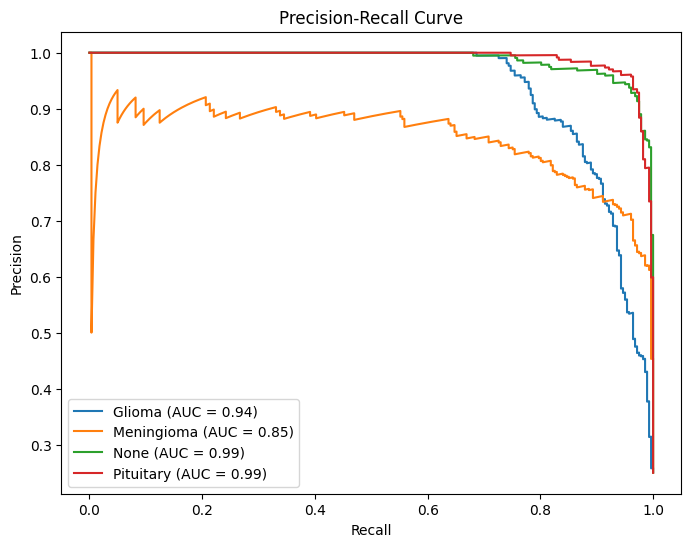

MCC: 0.85
Cohen's Kappa: 0.85


In [ ]:
# Set the model name to the third model in the MODELS list
model_name = MODELS[2]

# Check if the selected model is present in the trained_models dictionary
if model_name in trained_models:
    print(f"\nEvaluating model: {model_name}")  # Print message indicating the model being evaluated

    # Call the function to evaluate the model using the test data and class names
    evaluate_single_model(
        trained_models[model_name]["model"],  # The trained model to be evaluated
        trained_models[model_name]["X_test"],  # Test data (features)
        trained_models[model_name]["y_test"],  # Test labels
        trained_models[model_name]["class_names"]  # Class names for labeling
    )
else:
    print(f"Model {model_name} not found in trained_models.")  # Print message if the model is not found in the trained models dictionary

**InceptionV3 Evaluation**


Evaluating model: InceptionV3
36/36 ━━━━━━━━━━━━━━━━━━━━ 31s 770ms/step
Classification Report:
              precision    recall  f1-score   support

      Glioma       0.92      0.74      0.82       281
  Meningioma       0.69      0.92      0.79       281
        None       0.98      0.86      0.92       282
   Pituitary       0.93      0.92      0.93       281

    accuracy                           0.86      1125
   macro avg       0.88      0.86      0.86      1125
weighted avg       0.88      0.86      0.86      1125

Accuracy: 0.86


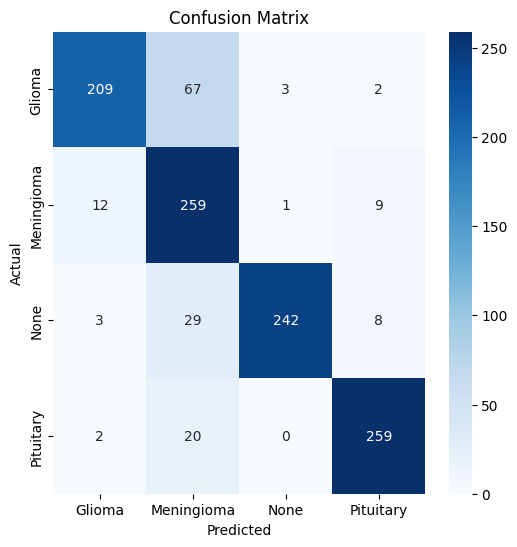

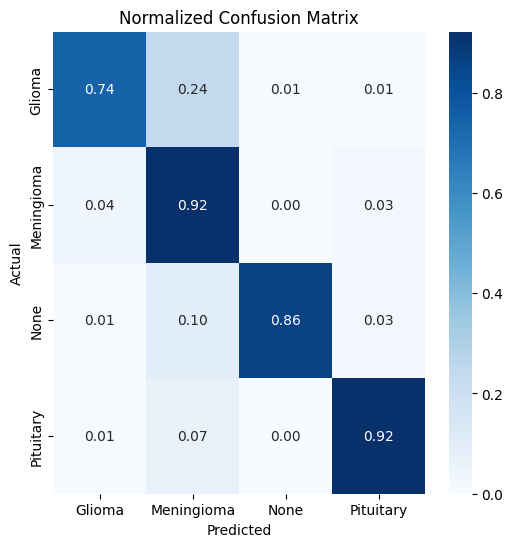

Multiclass ROC AUC Score: 0.98


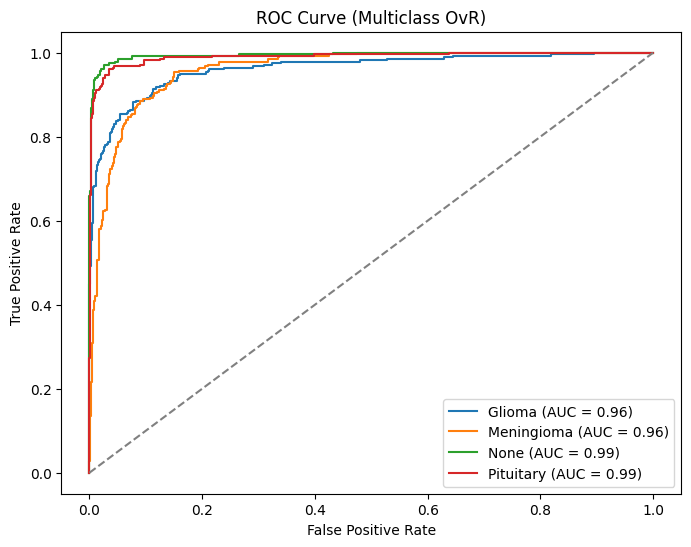

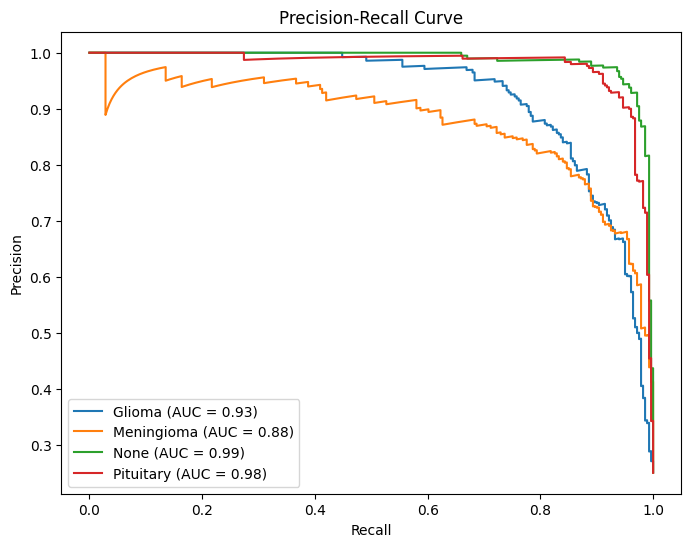

MCC: 0.82
Cohen's Kappa: 0.82


In [ ]:
# Set the model name to the fourth model in the MODELS list
model_name = MODELS[3]

# Check if the selected model is present in the trained_models dictionary
if model_name in trained_models:
    print(f"\nEvaluating model: {model_name}")  # Print message indicating the model being evaluated

    # Call the function to evaluate the model using the test data and class names
    evaluate_single_model(
        trained_models[model_name]["model"],  # The trained model to be evaluated
        trained_models[model_name]["X_test"],  # Test data (features)
        trained_models[model_name]["y_test"],  # Test labels
        trained_models[model_name]["class_names"]  # Class names for labeling
    )
else:
    print(f"Model {model_name} not found in trained_models.")  # Print message if the model is not found in the trained models dictionary

**Model Comparison**

In [21]:
# Call the compare_models function to evaluate and compare the performance of all models in the trained_models dictionary
compare_models(trained_models)

Evaluating Models...

36/36 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step


ResNet50                
         Precision Recall F1-score
CLASS                             
0             0.88   0.86     0.87
1             0.82   0.82     0.82
2             0.96   0.96     0.96
3             0.94   0.96     0.95
Average       0.90    0.9      0.9
Accuracy      0.90